In [ ]:
import numpy as np 
import pandas as pd 
import pydicom
import matplotlib.pyplot as plt
import plotly.express as px
import cv2 
import os 
from pathlib import Path
import seaborn as sns

## Loading data and define images folders paths

In [ ]:
test_folder = Path('../input/rsna-miccai-brain-tumor-radiogenomic-classification/test')
train_folder = Path('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train')

In [ ]:
train_data = pd.read_csv('../input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv')

## Checking if data have any Null values and types


In [ ]:
train_data.info()

## Here is the how our data looks like

In [ ]:
train_data.head()

## Total data count by MGMT_value

In [ ]:
# With Seaborn
sns.countplot(x="MGMT_value", data=train_data)

In [ ]:
# With Plotly.express
px.histogram(train_data, x="MGMT_value", color="MGMT_value")

## Stacking image folders path to the new column for easy use. 

In [ ]:
train_list = os.listdir(train_folder)
train_data['im_folder'] = sorted(train_list)

In [ ]:
train_data['im_path'] = [os.path.join(train_folder,data) for data in train_data["im_folder"]]

## Visualization of first 20 data's image class distribution.

In [ ]:
classes = ["FLAIR","T1w","T1wCE","T2w"]

In [ ]:
data_count = []

for index, data in train_data.iterrows():
    for c in classes:
        img_count = len(os.listdir(os.path.join(data["im_path"],c)))
        
        new = {'type': c,
              'img_count': img_count,
              'id': data['im_folder']}

        data_count.append(new)

In [ ]:
data_count_df = pd.DataFrame.from_dict(data_count)

In [ ]:
fig = px.bar(data_count_df.iloc[:56], x="id", y="img_count", color ="type" )
fig.show()

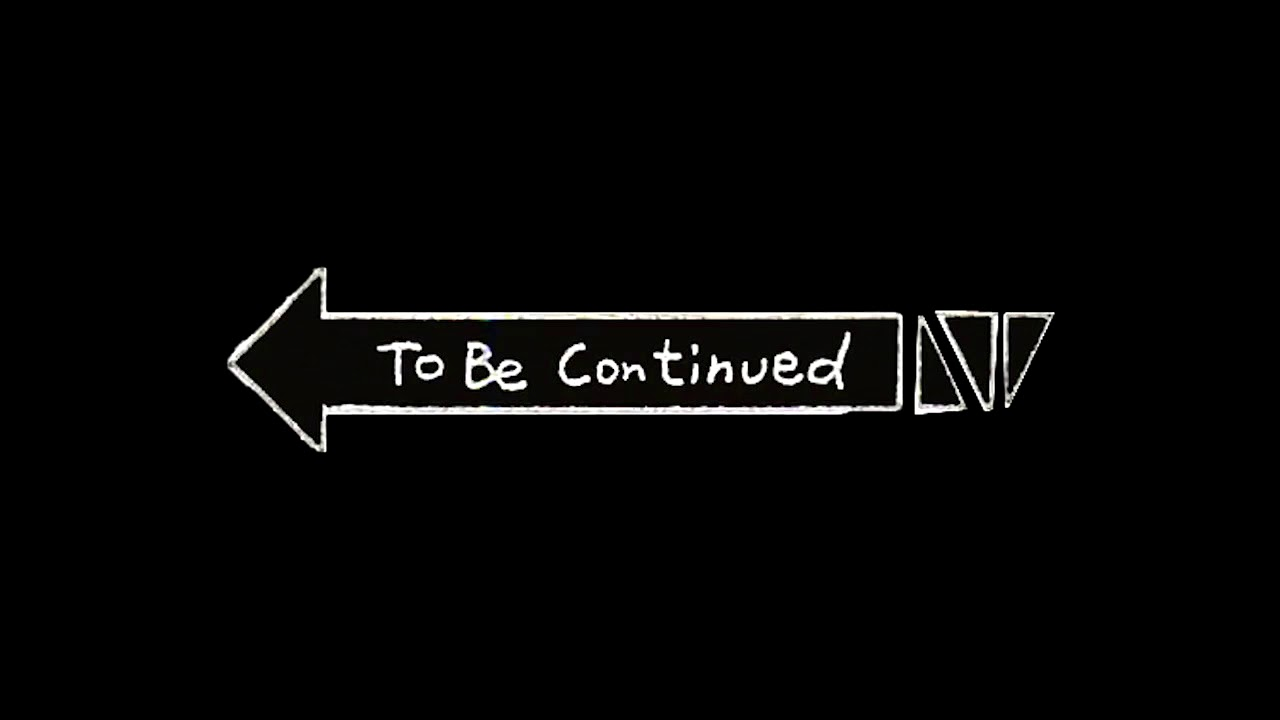